In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Veri setini yükleme
df = sns.load_dataset('mpg')

# NaN değerleri temizleme
df = df.dropna()

# Girdi ve hedef değişkenlerini tanımlama
X = df[['horsepower', 'acceleration', 'weight']]
y = df['mpg']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# KNN modeli 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred_knn = knn.predict(X_test_scaled)

# Hata ölçümü (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'KNN Model MSE: {mse_knn}')

KNN Model MSE: 18.58766


In [4]:
# Random Forest modeli oluşturma
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_rf = rf.predict(X_test)

# Hata ölçümü (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Model MSE: {mse_rf}')

Random Forest Model MSE: 17.776459524999993


In [5]:
# Yapay Sinir Ağı modeli oluşturun ve parametreleri iyileştirme
ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000, learning_rate_init=0.001, early_stopping=True, random_state=42)

# Modeli eğitme
ann.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred_ann = ann.predict(X_test_scaled)

# Hata ölçümü (MSE)
from sklearn.metrics import mean_squared_error
mse_ann = mean_squared_error(y_test, y_pred_ann)
print(f'ANN Model MSE: {mse_ann}')

ANN Model MSE: 16.059783082889346


In [6]:
# En düşük MSE bulunması
best_model = None
if mse_knn < mse_rf and mse_knn < mse_ann:
    best_model = knn
    print("En başarılı model: KNN")
elif mse_rf < mse_knn and mse_rf < mse_ann:
    best_model = rf
    print("En başarılı model: Random Forest")
else:
    best_model = ann
    print("En başarılı model: ANN")



En başarılı model: ANN


In [7]:

# Yeni veriyi oluşturma
new_data = pd.DataFrame([[130, 13, 3500]], columns=['horsepower', 'acceleration', 'weight'])

# Veriyi standardize etme (scaler'ın fit edildiği özellik isimleriyle uyumlu olacak)
new_data_scaled = scaler.transform(new_data)

# En başarılı modelinizle tahmin yapma
mpg_prediction = best_model.predict(new_data_scaled)

# Tahmin edilen 'mpg' değerini yazdırma
print(f'Tahmin Edilen mpg Değeri: {mpg_prediction[0]}')



Tahmin Edilen mpg Değeri: 15.960754508947634


In [8]:
# 8. Modellerin başarılarını karşılaştırma ve görselleştirme
models = ['KNN', 'Random Forest', 'ANN']
mse_values = [mse_knn, mse_rf, mse_ann]

In [9]:
# Başarı karşılaştırma tablosu
results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values
})
print("\nModel Karşılaştırma Tablosu:")
print(results_df)


Model Karşılaştırma Tablosu:
           Model        MSE
0            KNN  18.587660
1  Random Forest  17.776460
2            ANN  16.059783


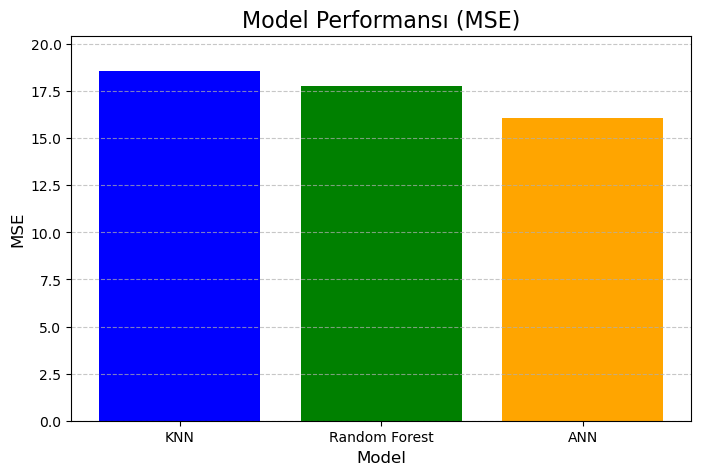

In [10]:
# Bar grafiği çizimi
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.title('Model Performansı (MSE)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.ylim(0, max(mse_values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
